In [ ]:
import numpy as np
import scipy as sp
from sympy import *
import scipy.stats as stats
from numpy.random import default_rng

import matplotlib.pyplot as plt

## Задание III.26


# I.  Jacobi iteration

Дано

$$
A x = b
$$

выделяем диагональную часть $D$,

$$ A = D + (A - D) $$

и запишем

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Затем 

$$
x_{n + 1} = B x_{n} + c\;,
$$

где 

$$
B = D^{-1} (A - D) \qquad \text{и} \qquad c - ?
$$

In [ ]:
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

In [ ]:
def Jacobi_iteration(B, c, x_0, eps=1e-9, maxiter=1000):
    x_ = x_0
    x = B @ x_ + c
    niter = 1
    while np.linalg.norm(x - x_) > eps and niter < maxiter:
        x_ = x
        x = B @ x_ + c
        niter += 1
    return x, niter

In [ ]:
rnd = np.random.RandomState(1234)
n = 10
for d in [15, 6]:
    A = rnd.uniform(size=(n, n)) + np.diag([d]* n)
    D = np.diag(np.diag(A))
    D_inv = D.copy()
    for i in range(n):
        D_inv[i, i] = 1 / D_inv[i, i]
    b = rnd.uniform(size=n)
    B = D_inv @ (D - A)
    c = D_inv @ b
    x, niter = Jacobi_iteration(B, c, rnd.uniform(size=n))
    print('Norm В:', np.linalg.norm(B), "\n")
    print('Ax - b:\n', A @ x - b, "\n")
    print('Iter count:', niter, "\n")

Norm В: 0.36436161983015336 

Ax - b:
 [-1.38655720e-09 -1.21060628e-09 -1.14650733e-09 -1.42907508e-09
 -7.53300089e-10 -1.21263291e-09 -7.66766317e-10 -9.37751987e-10
 -1.26737934e-09 -1.10200260e-09] 

Iter count: 19 

Norm В: 0.8803221540746667 

Ax - b:
 [-9.50775070e-10 -9.32463991e-10 -9.37957156e-10 -1.57862012e-09
 -1.62546060e-09 -1.31884859e-09 -1.18245586e-09 -1.18678328e-09
 -1.41950790e-09 -1.15464666e-09] 

Iter count: 73 



## Задание III.4


Нужно 2 итерации 



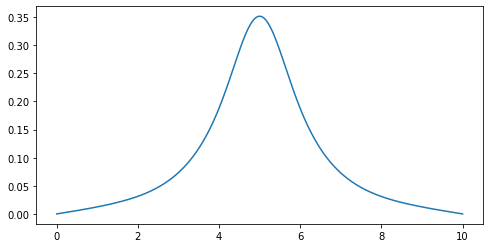

In [ ]:
x = np.linspace(0, 10, 1000)
rnd = np.random.RandomState(1234)
fi_ = rnd.uniform(size=1000)
h = 0.01
A = np.zeros((1000, 1000))
b = np.empty(1000)

def func1(a, b, aa, aaa, h):
    return np.exp(a) - 1 - np.exp(-3 * (b - 5)**2) - (aa + aaa - 2 * a) / h**2

def func2(a, b, aa, h):
    return np.exp(a) - 1 - np.exp(-3 * (b - 5)**2) - (aa - 2 * a) / h**2 

for i in range(1000):
    A[i, i] = - (2 / h**2 + np.exp(fi_[i]))
    if i > 0:
        A[i - 1, i] = 1 / h**2
        if i < 999:
            b[i] = func1(fi_[i], x[i], fi_[i + 1], fi_[i - 1], h)
        else:
            b[i] = func2(fi_[i], x[i], fi_[i - 1], h)                                                                
    else:
        b[i] = func2(fi_[i], x[i], fi_[i + 1], h)                                                  
    if i < 999:
        A[i + 1, i] = 1 / h**2
ab = np.zeros((3, 1000))
for i in range(1000):
    ab[1, i] = A[i, i]
    if i > 0:
        ab[0, i] = A[i - 1, i]
    if i < 999:
        ab[2, i] = A[i + 1, i]
fi = sp.linalg.solve_banded((1, 1), ab, b) + fi_
niter = 1

while np.linalg.norm(fi_next - fi_) > 1e-10 and niter < 1000:
    fi_ = fi
    for i in range(1000):
        A[i, i] = - (2 / h**2 + np.exp(fi_[i]))
        if i > 0:
            if i < 999:
                b[i] = func1(fi_[i], x[i], fi_[i + 1], fi_[i - 1], h)                                              
            else:
                b[i] = func2(fi_[i], x[i], fi_[i - 1], h)                                                        
        else:
            b[i] = func2(fi_[i], x[i], fi_[i + 1], h)
                                                      
    for i in range(1000):
        ab[1, i] = A[i, i]
        if i > 0:
            ab[0, i] = A[i - 1, i]
        if i < 999:
            ab[2, i] = A[i + 1, i]
    fi += sp.linalg.solve_banded((1, 1), ab, b)
    niter += 1
print("Нужно", niter, "итерации \n")
fig = plt.figure(figsize=[8, 4])
plt.plot(x, fi_next)

## Задание III.5

Фрактал Ньютона.  
Рассмотрим уравнение

$$
x^3 = 1
$$

Оно имеет три решения в комплексной плоскости, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

В зависимости от начального приближения, итерации Ньютона сойдутся к одному из этих решений (для получения комплексно-значного корня необходимо стартовать с началь ного значения с ненулевой мнимой частью). 
Постройте в комплексной плоскости $\textit{бассейны притяжения}$ корней. Для этого проведите серию вычислений с начальными условиями на сетке в комплексной плос-
кости переменной $x$. Далее раскрасьте сетку в три цвета согласно значению корня, к которому сошлись
итерации (удобно для каждого значения начальных условий выполнять фиксированное число итераций).

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 0
    x = x0 + 2 * eps
    while True:
        x = x0 - f(x0) / fder(x0)
        niter += 1
        if abs(x - x0) <= eps or niter == maxiter:
            break
        x0 = x
    return x, niter

In [ ]:
f = lambda z: z**3 - 1

fder = lambda z: 3 * z**2

import cmath

points = 2000
eps = 1e-10

x_range = np.linspace(-4, 6, points)
y_range = np.linspace(-4, 6, points)

fractal = np.zeros(shape=(points, points))

for i in range(points):
    for j in range(points):
        x = x_range[i]
        y = y_range[j]
        z = complex(x,y)
        root, iteration = newton_iteration(f, fder, z, eps=1e-10, maxiter=100)
        if abs(root - cmath.exp(2*(0+1j)*cmath.pi*0/3)) < eps:
            fractal[i, j] = 1
        if abs(root - cmath.exp(2*(0+1j)*cmath.pi*1/3)) < eps:
            fractal[i, j] = 2
        if abs(root - cmath.exp(2*(0+1j)*cmath.pi*2/3)) < eps:
            fractal[i, j] = 3

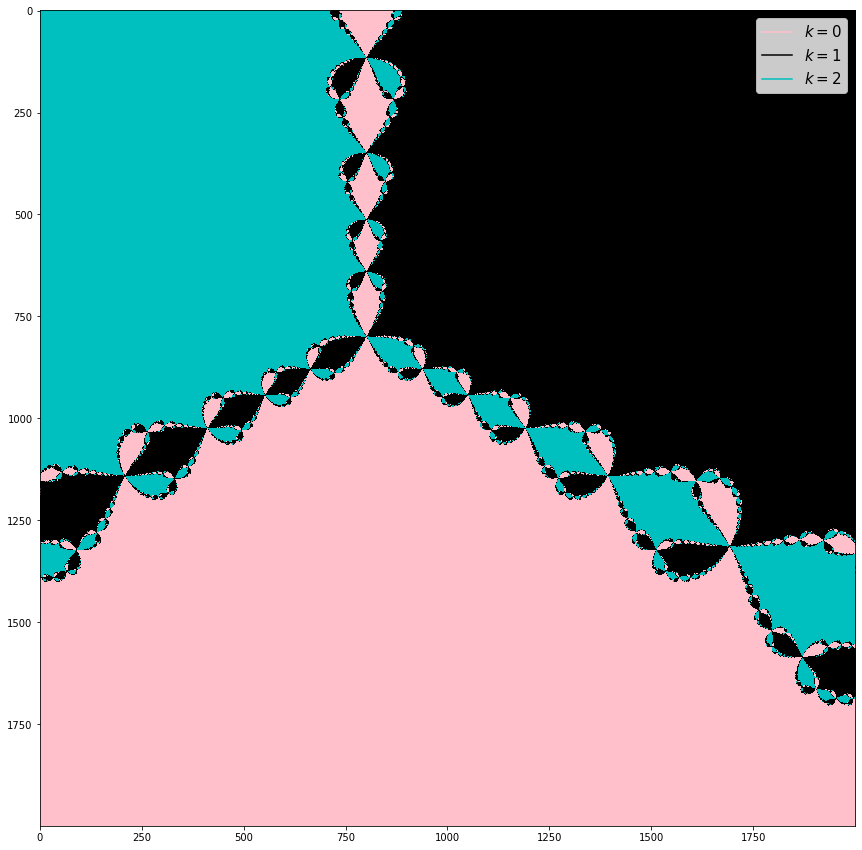

In [ ]:
from matplotlib import colors

cmap = colors.ListedColormap(['pink', 'black', 'c'])
bounds = [0, 1, 2, 3]

fig = plt.figure(figsize=[15, 15])

plt.plot(0, 0, color='pink', label=r'$k=0$')
plt.plot(0, 0, color='black', label=r'$k=1$')
plt.plot(0, 0, color='c', label=r'$k=2$')

plt.legend(prop={'size': 15})
plt.imshow(fractal, cmap=cmap)
plt.show()
fig.savefig('temp')